In [3]:

from shapely.geometry import LineString, Point
import numpy as np

In [31]:

points = [(-1,0), (0,0), (1,1), (2,0), (-0.5,0), (0, -1)]
r = 0.3
s = LineString(points)
s = s.union(Point(0, -1))


P = np.array(points)
D = s.buffer(r)
D.interiors[0]. 


True

In [373]:


parts = D.geoms if hasattr(D, "geoms") else [D]

for part in parts:
    segments = []
    for g in [part.exterior] + list(part.interiors):
        C = np.array(g.coords)

        dist = np.sum((P[np.newaxis,:,:] - C[:,np.newaxis,:]) ** 2, axis=-1) 
        on_circle = abs(dist - r ** 2) < 1e-5

        # treat one point arcs as line points
        rot_up = np.roll(on_circle, -1, axis = 0)
        rot_dn = np.roll(on_circle, 1, axis = 0)
        on_circle = (rot_up | rot_dn) & on_circle

        chunks = [
            (C[pos:pos+length], value)
            for length, pos, value in zip(*run_lengths(on_circle))
        ]

        if len(chunks) > 1:
            if np.all(chunks[0][1] == chunks[-1][1]):
                chunks[0] = (np.vstack([chunks[-1][0], chunks[0][0]]), chunks[0][1])
                del chunks[-1]

        segments.append(chunks)

    print(segments)


[[(array([[-0.5, -0.3],
       [-0.5, -0.3]]), array([False, False, False, False,  True, False])), (array([[-1.00000000e+00, -3.00000000e-01],
       [-1.02940514e+00, -2.98555418e-01],
       [-1.05852710e+00, -2.94235584e-01],
       [-1.08708540e+00, -2.87082101e-01],
       [-1.11480503e+00, -2.77163860e-01],
       [-1.14141902e+00, -2.64576379e-01],
       [-1.16667107e+00, -2.49440884e-01],
       [-1.19031799e+00, -2.31903136e-01],
       [-1.21213203e+00, -2.12132034e-01],
       [-1.23190314e+00, -1.90317985e-01],
       [-1.24944088e+00, -1.66671070e-01],
       [-1.26457638e+00, -1.41419021e-01],
       [-1.27716386e+00, -1.14805030e-01],
       [-1.28708210e+00, -8.70854032e-02],
       [-1.29423558e+00, -5.85270966e-02],
       [-1.29855542e+00, -2.94051421e-02],
       [-1.30000000e+00,  3.67394040e-17],
       [-1.29855542e+00,  2.94051421e-02],
       [-1.29423558e+00,  5.85270966e-02],
       [-1.28708210e+00,  8.70854032e-02],
       [-1.27716386e+00,  1.14805030e-01

In [355]:

    dist = np.sum((P[np.newaxis,:,:] - C[:,np.newaxis,:]) ** 2, axis=-1) ** 0.5
    on_circle = abs(dist - r) < 1e-5
    on_circle.shape

(80, 5)

In [314]:
D = s.buffer(r)
p = D.geoms[0]
p.interiors


In [5]:
def run_lengths(inarray):
        """https://stackoverflow.com/questions/1066758/find-length-of-sequences-of-identical-values-in-a-numpy-array-run-length-encodi """
        ia = np.asarray(inarray)                # force numpy
        n = len(ia)
        if n == 0: 
            return ([], [], [])
        else:
            y = np.any(ia[1:] != ia[:-1], axis=-1)          # pairwise unequal (string safe)
            i = np.append(np.where(y), n - 1)   # must include last element posi
            z = np.diff(np.append(-1, i))       # run lengths
            p = np.cumsum(np.append(0, z))[:-1] # positions
            return(z, p, ia[i])


run_lengths(on_circle)

NameError: name 'on_circle' is not defined

A -1.1 -0.3 0.3 0.3 0 0 -1.1 -0.3 

A -0.5 -0.3 0.3 0.3 0 0 -0.5 -0.3 

A -0.5 -0.3 0.3 0.3 0 0 -0.5 -0.3 

A -0.5 -0.3 0.3 0.3 0 0 -0.5 -0.3 

A -0.5 -0.3 0.3 0.3 0 0 -0.5 -0.3 

A -0.5 -0.3 0.3 0.3 0 0 -0.5 -0.3 

A -0.5 -0.3 0.3 0.3 0 0 -0.5 -0.3 

A -0.5 -0.3 0.3 0.3 0 0 -0.5 -0.3 

A -0.5 -0.3 0.3 0.3 0 0 -0.5 -0.3 

A -0.5 -0.3 0.3 0.3 0 0 -0.5 -0.3 

A -0.5 -0.3 0.3 0.3 0 0 -0.5 -0.3 

A -0.5 -0.3 0.3 0.3 0 0 -0.5 -0.3 

A -0.5 -0.3 0.3 0.3 0 0 -0.5 -0.3 

A -0.5 -0.3 0.3 0.3 0 0 -0.5 -0.3 

A -0.5 -0.3 0.3 0.3 0 0 -0.5 -0.3 

A -0.5 -0.3 0.3 0.3 0 0 -0.5 -0.3 

A -0.5 -0.3 0.3 0.3 0 0 -0.5 -0.3 

A -0.5 -0.3 0.3 0.3 0 0 -0.5 -0.3 

A -0.5 -0.3 0.3 0.3 0 0 -0.5 -0.3 

A -0.5 -0.3 0.3 0.3 0 0 -0.5 -0.3 

A -0.5 -0.3 0.3 0.3 0 0 -0.5 -0.3 

A -0.5 -0.3 0.3 0.3 0 0 -0.5 -0.3 

A -0.5 -0.3 0.3 0.3 0 0 -0.5 -0.3 

A -0.5 -0.3 0.3 0.3 0 0 -0.5 -0.3 

A -0.5 -0.3 0.3 0.3 0 0 -0.5 -0.3 

A -0.5 -0.3 0.3 0.3 0 0 -0.5 -0.3 

A -0.5 -0.3 0.3 0.3 0 0 -0.5 -0.3 

A -0.5 -0.3 0.3 0.3 0 0 -0.5

In [18]:

points = [(-1,0), (0,0), (1,1), (2,0), (-0.5,0)]
r = 0.3
s = LineString(points)
s = s.union(Point(0, -1))

inner = s.buffer(r).geoms[0].boundary.geoms[1]
h = s.buffer(r).geoms[0]
h.exterior.is_ccw

False

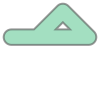

In [22]:
s.buffer(r).geoms[0].ine

In [9]:
for i in range(on_circle.shape[0]):
    on_this_circle = on_circle[i]
    length, pos, value = run_lengths(on_this_circle)

    arc_points = [(np.take(C, (p-1,p+l-1), axis=0), l) for l,p,v in zip(length, pos, value) if v]
    arc_template = "A %1.1f %1.1f %1.1f %1.1f %g %g %1.1f %1.1f "

    for endpoints, length in arc_points:
        large_arc = 1 if length > 32 else 0
        p = endpoints
        print(arc_template % (p[0,0], p[0,1], r, r, 0, large_arc, p[1,0], p[1,1]))
    print()




NameError: name 'on_circle' is not defined

In [11]:
shapely.__version__

NameError: name 'shapely' is not defined